<a href="https://colab.research.google.com/github/Mpogazi/ml-question-bank/blob/main/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [ ]:
class MNISTCNN(nn.Module):
  def __init__(self):
    super().__init__()
    # PLEASE IMPLEMENT
    self.fc1 = nn.Linear(784, 10)

  def forward(self, x):
    # PLEASE IMPLEMENT
    return torch.rand((x.shape[0], 10), device=x.device)

In [ ]:
transforms = transforms.Compose([
  transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
def show_images(images, labels, rows=4, cols=4, predicted=False):
  fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'{"Predicted" if predicted else "real"} Label: {labels[i].item()}')
    ax.axis('off')
  plt.tight_layout()
  plt.show()


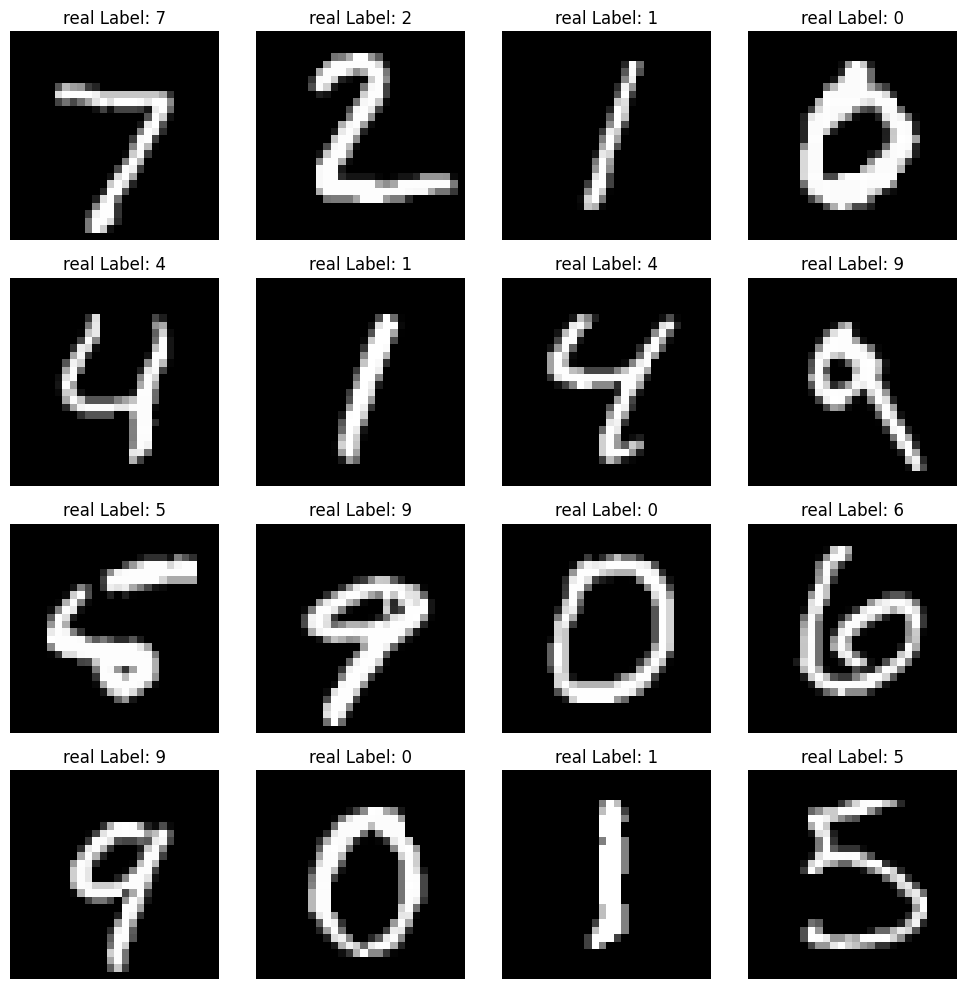

In [ ]:
images, labels = next(iter(test_loader))
show_images(images, labels)

In [ ]:
# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNISTCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(5):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    # loss.backward()
    optimizer.step()

    if batch_idx % 400 == 0:
      print(f'Epoch {epoch}, Batch {batch_idx}, loss: {loss.item()}')

Epoch 0, Batch 0, loss: 2.335918664932251
Epoch 0, Batch 400, loss: 2.388558864593506
Epoch 0, Batch 800, loss: 2.2617485523223877
Epoch 1, Batch 0, loss: 2.391775131225586
Epoch 1, Batch 400, loss: 2.312864065170288
Epoch 1, Batch 800, loss: 2.30397891998291
Epoch 2, Batch 0, loss: 2.298140525817871
Epoch 2, Batch 400, loss: 2.3595640659332275
Epoch 2, Batch 800, loss: 2.3315601348876953
Epoch 3, Batch 0, loss: 2.3495349884033203
Epoch 3, Batch 400, loss: 2.3245620727539062
Epoch 3, Batch 800, loss: 2.3662147521972656
Epoch 4, Batch 0, loss: 2.3571248054504395
Epoch 4, Batch 400, loss: 2.3894171714782715
Epoch 4, Batch 800, loss: 2.351173162460327


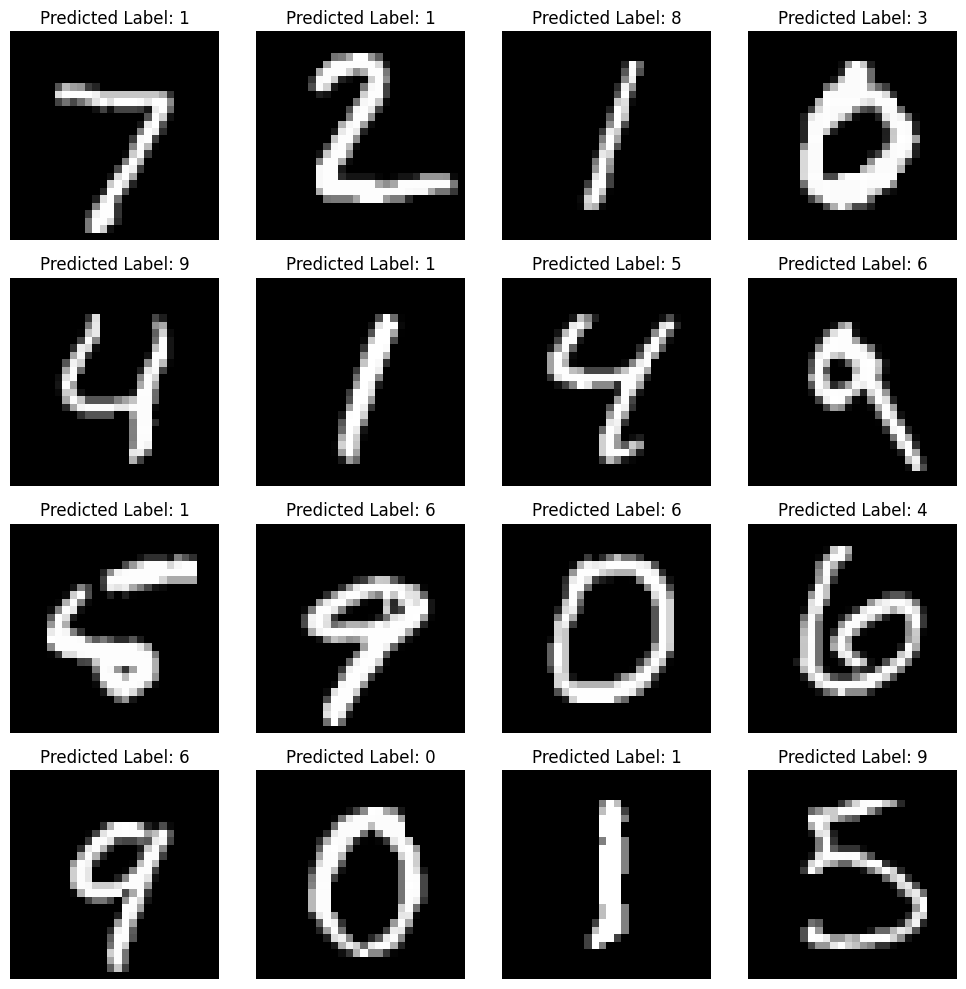

In [ ]:
sample_test_data = next(iter(test_loader))
sample_images, sample_labels = sample_test_data
sample_images, sample_labels = sample_images.to(device), sample_labels.to(device)
model.eval()
with torch.no_grad():
  output = model(sample_images)
  output = torch.argmax(output.softmax(dim=1), dim=1).unsqueeze(1)
  show_images(sample_images.cpu(), output.cpu(), predicted=True)
